In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [48]:
# Chargement du dataset: 
import kagglehub
import os
import chardet

path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
csv_file = os.path.join(path, "Sample - Superstore.csv")

with open(csv_file, "rb") as f:
    raw = f.read()

enc = chardet.detect(raw)
print(enc)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [49]:
df = pd.read_csv(csv_file, encoding="Windows-1252")

In [50]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [51]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [52]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [53]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [54]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [55]:
from decimal import Decimal

# ---- ÉTAPE 1 : Nettoyer les noms de colonnes ----
def clean_columns(df):
    df = df.copy()
    
    # Nettoyage des noms de colonnes
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(r'[^\w\s]', '', regex=True)
                  .str.replace(r'\s+', '_', regex=True)
    )
    
    # 🔴 Suppression du colonne row_id (après nettoyage du nom)
    if "row_id" in df.columns:
        df = df.drop(columns=["row_id"])
    
    return df


# ---- ÉTAPE 2 : Conversion des types 
def convert_types(df):
    df = df.copy()
    
    # Conversion en string
    df['postal_code'] = df['postal_code'].astype(str)
    
    # Conversion en datetime
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')
    
    # Conversion en float
    df['sales'] = df['sales'].astype(float)
    df['discount'] = df['discount'].astype(float)
    
    
    return df


# ---- ÉTAPE 3 : Pipeline complet ----
def pipeline(df):
    df = clean_columns(df)
    df = convert_types(df)
    
    # 🔹 Vérification et suppression des doublons
    print("Nombre de doublons avant suppression:", df.duplicated().sum())
    df = df.drop_duplicates()
    print("Nombre de doublons après suppression:", df.duplicated().sum())
    
    return df


# ---- ÉTAPE 4 : Application du pipeline ----
df_cleaned = pipeline(df)

# Vérification
print(df_cleaned.dtypes)
print(df_cleaned.head())


Nombre de doublons avant suppression: 1
Nombre de doublons après suppression: 0
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code              object
region                   object
product_id               object
category                 object
subcategory              object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object
         order_id order_date  ship_date       ship_mode customer_id  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Cla

Ce projet consiste à mieux comprendre les ventes de SuperStore, ses produits, ses clients et ses performances logistiques pour maximiser le profit global, la gestion des stocks et des livraisons, identifier les clients et produits stratégiques et à prendre des décisions basées sur les données pour les promotions et les stratégies de vente.  

## Problèmatique: 
* Quels produits devraient être mis en avant pour maximiser le profit ? "prédiction du profit par commande"

* Quels clients devraient être ciblés pour des promotions personnalisées? "segmentation des clients" autrement-dit : identifier des groupes de clients à forte valeur ou clients à risque

In [56]:
df_cleaned.head(1)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [57]:
# Création de la colonne 'shipping_time' en jours
df_cleaned['shipping_time_days'] = (df_cleaned["ship_date"] - df_cleaned['order_date']).dt.days

# Vérification
df_cleaned[['order_date', 'ship_date', 'shipping_time_days']].head()


,order_date,ship_date,shipping_time_days
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7


In [58]:
df_cleaned.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'subcategory', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'shipping_time_days'],
      dtype='object')

* Analyse descriptive (KPIs)

In [59]:
# Chiffre d'affaire total et profit total

total_sales = df_cleaned['sales'].sum()
total_profit = df_cleaned['profit'].sum()
avg_discount = df_cleaned['discount'].mean()
avg_shipping_time = df_cleaned['shipping_time_days'].mean()

display(f"Total Sales: ${total_sales:,.2f}")
display(f"Total Profit: ${total_profit:,.2f}")
display(f"Average Discount: {avg_discount:.2%}")
display(f"Average Shipping Time: {avg_shipping_time:.2f} days")

'Total Sales: $2,296,919.49'

'Total Profit: $286,409.08'

'Average Discount: 15.62%'

'Average Shipping Time: 3.96 days'

In [60]:
df_cleaned.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_time_days
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,229.852846,3.789753,0.156188,28.660971,3.958171
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.731000,3.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.480000,3.000000,0.200000,8.671000,4.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000,5.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,7.000000
std,NaN,NaN,623.276074,2.225149,0.206457,234.271476,1.747654


* Analyse par Catégorie et Région

In [61]:
# Profit par catégorie
profit_category = df_cleaned.groupby('category')['profit'].sum().sort_values(ascending=False)
print(profit_category)

# Profit par région
profit_region = df_cleaned.groupby('region')['profit'].sum().sort_values(ascending=False)
print(profit_region)

# Visualisation avec Plotly
fig = px.bar(
    profit_category,
    x=profit_category.index,
    y=profit_category.values,
    title="Profit par Category",
    labels={'x':'Category','y':'Profit'},
    color=profit_category.values,
    color_continuous_scale='Blues'
)

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(template='plotly_white', xaxis_tickangle=-30)
fig.show()

fig = px.bar(profit_region, x=profit_region.index, y=profit_region.values, 
             title="Profit par Region", labels={'x':'Region','y':'Profit'}, color=profit_region.values, color_continuous_scale="Reds")
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(template='plotly_white', xaxis_tickangle=-30)
fig.show()

category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18463.3316
Name: profit, dtype: float64
region
West       108418.4489
East        91534.8388
South       46749.4303
Central     39706.3625
Name: profit, dtype: float64


* Relation entre Discount et Profit: 

Que se passe-t-il pour le profit à chaque niveau de Discount ? 


In [62]:
df_cleaned['discount_bin'] = pd.cut(
    df_cleaned['discount'],
    bins=[-0.01, 0, 0.1, 0.2, 0.3, 1],
    labels=['0%', '0–10%', '10–20%', '20–30%', '30%+']
)

profit_by_discount = df_cleaned.groupby('discount_bin')['profit'].mean()
profit_by_discount


C:\Users\rokha\AppData\Local\Temp\ipykernel_7948\2444379887.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



discount_bin
0%         66.900292
0–10%      96.055074
10–20%     24.738824
20–30%    -45.828401
30%+     -107.209930
Name: profit, dtype: float64

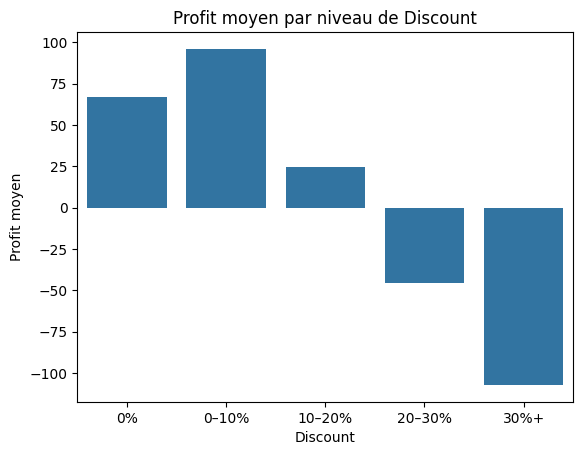

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x=profit_by_discount.index,
    y=profit_by_discount.values
)
plt.title("Profit moyen par niveau de Discount")
plt.xlabel("Discount")
plt.ylabel("Profit moyen")
plt.show()


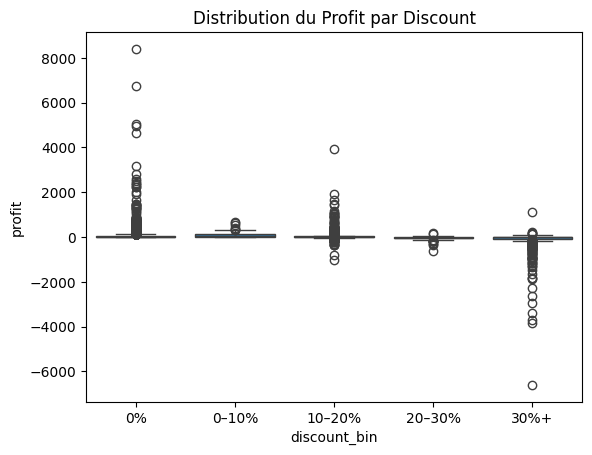

In [64]:
sns.boxplot(
    data=df_cleaned,
    x='discount_bin',
    y='profit'
)
plt.title("Distribution du Profit par Discount")
plt.show()


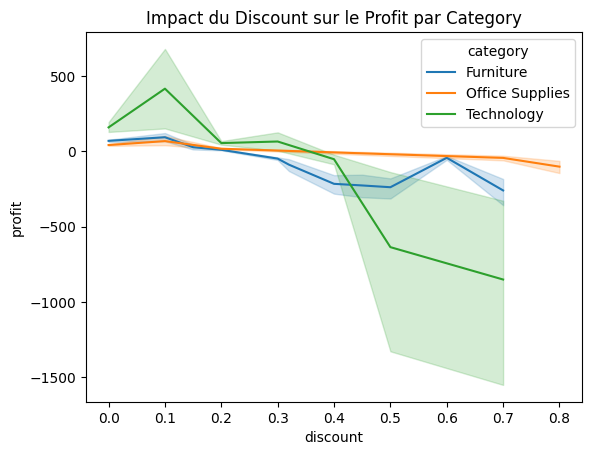

In [65]:
sns.lineplot(
    data=df_cleaned,
    x='discount',
    y='profit',
    hue='category',
    estimator='mean'
)
plt.title("Impact du Discount sur le Profit par Category")
plt.show()


In [66]:
correlation = df_cleaned['discount'].corr(
    df_cleaned['profit'],
    method='spearman'
)
print(f"Spearman Correlation: {correlation:.2f}")


Spearman Correlation: -0.54


# Relation entre Discount et Profit
* La relation entre le discount et le profit n'est pas linéaire. 
* Les faibles discounts(<= 10%) préservent généralement la rentabilité.
* Les discounts élevés (>= 20%) augmentent la volatilité et le risque de pertes. 
* L'impact du discount varie selon la catégorie de produits. 

# Conclusion: 
Une analyse par niveau de discount et par catégorie est plus pertinente qu'une corrélation globale. 



### Analyse des modes de livraison

ship_mode
Same Day          0.044199
First Class       2.182705
Second Class      3.238046
Standard Class    5.006704
Name: shipping_time_days, dtype: float64


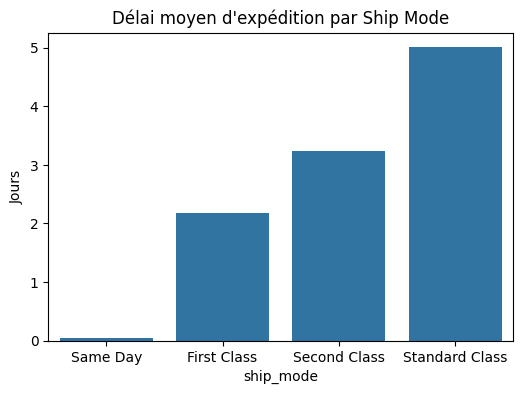

In [67]:
# Délai moyen d'expédition par Ship Mode
shipping_mode = df_cleaned.groupby('ship_mode')['shipping_time_days'].mean().sort_values()
print(shipping_mode)

# Visualisation
plt.figure(figsize=(6,4))
sns.barplot(x=shipping_mode.index, y=shipping_mode.values)
plt.title("Délai moyen d'expédition par Ship Mode")
plt.ylabel("Jours")
plt.show()


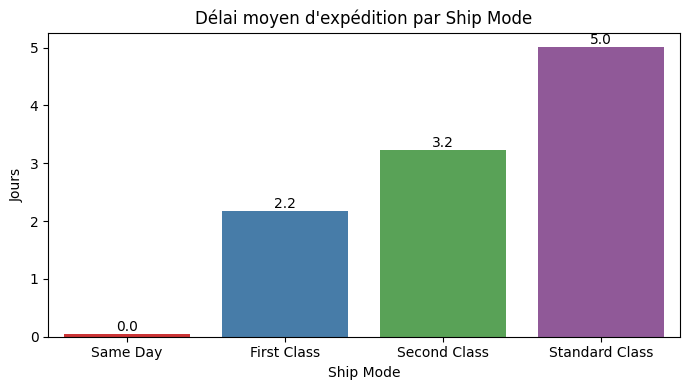

In [68]:
plt.figure(figsize=(7,4))

ax = sns.barplot(
    x=shipping_mode.index,
    y=shipping_mode.values,
    hue= shipping_mode.index,
    palette="Set1",
    legend=False
)

plt.title("Délai moyen d'expédition par Ship Mode")
plt.ylabel("Jours")
plt.xlabel("Ship Mode")

# Afficher les valeurs sur les barres  
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [69]:
%whos

Variable             Type              Data/Info
------------------------------------------------
Decimal              type              <class 'decimal.Decimal'>
FuncFormatter        type              <class 'matplotlib.ticker.FuncFormatter'>
avg_discount         float64           0.1561883318322826
avg_shipping_time    float64           3.9581707195036526
ax                   Axes              Axes(0.0759325,0.145694;0.902639x0.759722)
ax1                  Axes              Axes(0.110153,0.064537;0.874847x0.833241)
bar                  Rectangle         Rectangle(xy=(2.75, 0), w<...>, height=164101, angle=0)
bars                 BarContainer      <BarContainer object of 4 artists>
bins                 ndarray           9: 9 elems, type `float64`, 72 bytes
chardet              module            <module 'chardet' from 'C<...>s\\chardet\\__init__.py'>
clean_columns        function          <function clean_columns at 0x000001B2348789A0>
convert_types        function          <function co

In [70]:
df_cleaned.shape
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            9993 non-null   object        
 1   order_date          9993 non-null   datetime64[ns]
 2   ship_date           9993 non-null   datetime64[ns]
 3   ship_mode           9993 non-null   object        
 4   customer_id         9993 non-null   object        
 5   customer_name       9993 non-null   object        
 6   segment             9993 non-null   object        
 7   country             9993 non-null   object        
 8   city                9993 non-null   object        
 9   state               9993 non-null   object        
 10  postal_code         9993 non-null   object        
 11  region              9993 non-null   object        
 12  product_id          9993 non-null   object        
 13  category            9993 non-null   object        
 1

,order_date,ship_date,sales,quantity,discount,profit,shipping_time_days
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,229.852846,3.789753,0.156188,28.660971,3.958171
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.731000,3.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.480000,3.000000,0.200000,8.671000,4.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000,5.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,7.000000
std,NaN,NaN,623.276074,2.225149,0.206457,234.271476,1.747654


Analyse du Profit


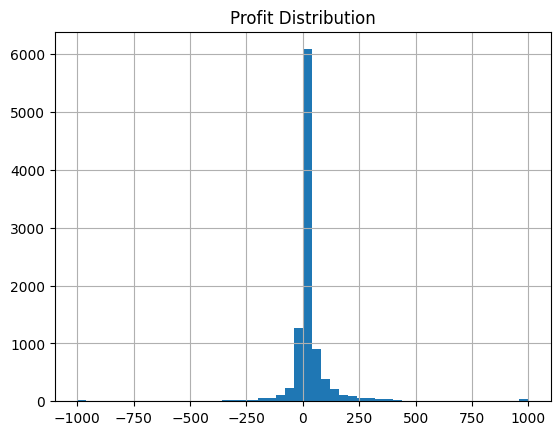

In [71]:
"Distribution du profit "

import matplotlib.pyplot as plt

plt.figure()
df_cleaned["profit"].clip(-1000, 1000).hist(bins=50)
plt.title("Profit Distribution")
plt.show()



Beaucoup de ventes génèrent peu de profit

Quelques ventes génèrent de fortes pertes

La rentabilité est instable

Analyse des pertes

In [72]:
nb_pertes = (df_cleaned["profit"] < 0).sum()
nb_total = len(df_cleaned)

taux_perte = (nb_pertes / nb_total) * 100

print(f"Nombre de transactions déficitaires : {nb_pertes}")
print(f"Nombre total de transactions : {nb_total}")
print(f"Taux de perte : {taux_perte:.2f}%")


Nombre de transactions déficitaires : 1870
Nombre total de transactions : 9993
Taux de perte : 18.71%


Environ 18,7 % des transactions génèrent une perte.
Cela indique qu’une part non négligeable des ventes impacte négativement la rentabilité globale.

Analyse remise vs Profit

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Création des tranches
bins = np.linspace(0, 0.8, 9)
df_cleaned["discount_bin_curve"] = pd.cut(df_cleaned["discount"], bins)

In [74]:
profit_moyen = df_cleaned.groupby(
    "discount_bin_curve", observed=False
)["profit"].mean()


In [75]:
labels_percent = [
    f"{int(interval.left*100)}–{int(interval.right*100)}%"
    for interval in profit_moyen.index
]


Le profit moyen diminue fortement lorsque la remise dépasse 20 %.
Les remises supérieures à 30 % génèrent en moyenne des pertes significatives.

In [76]:
df_cleaned["order_date"] = pd.to_datetime(df_cleaned["order_date"])


In [77]:
df_cleaned["year"] = df_cleaned["order_date"].dt.year


In [78]:
profit_annuel = df_cleaned.groupby("year")["profit"].sum()

profit_annuel


year
2014    49556.0329
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: profit, dtype: float64

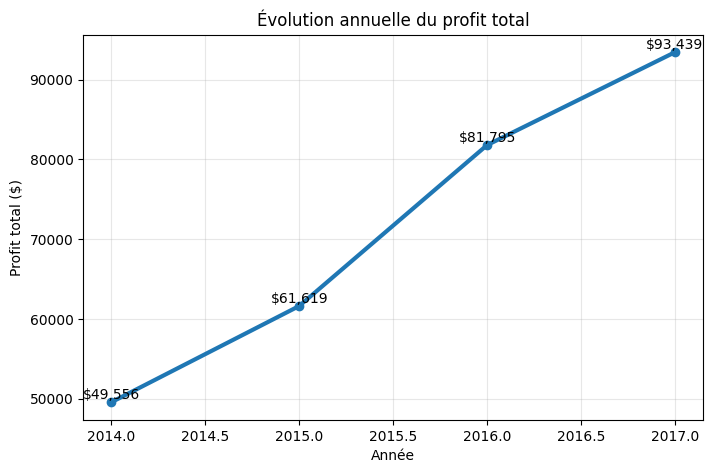

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
profit_annuel.plot(marker="o", linewidth=3)

for i, value in enumerate(profit_annuel):
    plt.text(profit_annuel.index[i], value, f"${value:,.0f}",
             ha="center", va="bottom")

plt.title("Évolution annuelle du profit total")
plt.xlabel("Année")
plt.ylabel("Profit total ($)")
plt.grid(alpha=0.3)
plt.show()




In [80]:
"croissance annuelle"

croissance = profit_annuel.pct_change() * 100
croissance

year
2014          NaN
2015    24.341276
2016    32.744284
2017    14.235675
Name: profit, dtype: float64

In [81]:
df_cleaned["order_date"].dt.month.value_counts().sort_index()

order_date
1      381
2      300
3      696
4      667
5      735
6      717
7      710
8      706
9     1383
10     819
11    1471
12    1408
Name: count, dtype: int64

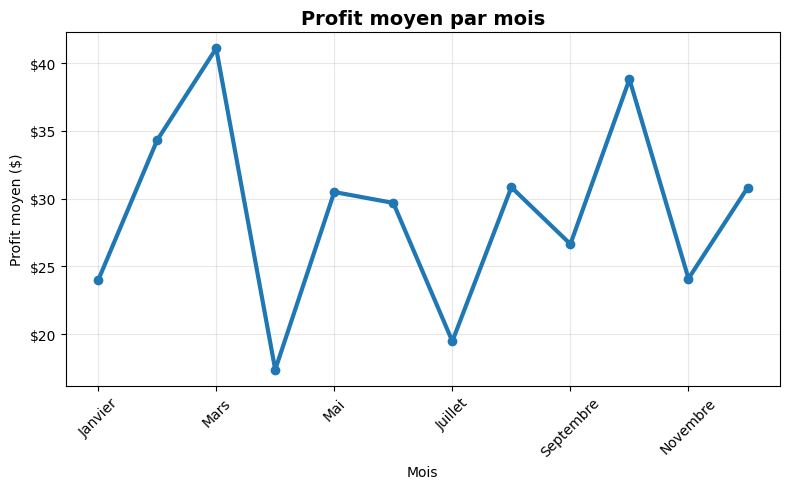

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 🔹 Sécuriser format date
df_cleaned["order_date"] = pd.to_datetime(df_cleaned["order_date"])

# 🔹 Créer colonne month
df_cleaned["month"] = df_cleaned["order_date"].dt.month

# 🔹 Mois en français
mois_fr = {
    1: "Janvier", 2: "Février", 3: "Mars", 4: "Avril",
    5: "Mai", 6: "Juin", 7: "Juillet", 8: "Août",
    9: "Septembre", 10: "Octobre", 11: "Novembre", 12: "Décembre"
}

# 🔹 Calcul profit moyen
profit_mensuel = (
    df_cleaned
    .groupby("month")["profit"]
    .mean()
    .reindex(range(1,13))
)

# 🔹 Remplacer index par noms
profit_mensuel.index = [mois_fr[i] for i in range(1,13)]

# 🔹 Formatter $
def dollar_format(x, pos):
    return f"${x:,.0f}"

# 🔹 Graphique
plt.figure(figsize=(8,5))
profit_mensuel.plot(marker="o", linewidth=3)

plt.title("Profit moyen par mois", fontsize=14, fontweight="bold")
plt.xlabel("Mois")
plt.ylabel("Profit moyen ($)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_format))

plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




Le profit moyen atteint environ 41 en mars, contre seulement 17  en avril, indiquant une forte variabilité saisonnière.

Analyse : profit total + Marge (%)

In [83]:
# Agrégation
perf_cat = df_cleaned.groupby("category").agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
})

# Calcul de la marge
perf_cat["% de profit"] = (perf_cat["profit"] / perf_cat["sales"]) * 100

perf_cat

,sales,profit,discount,% de profit
category,,,,
Furniture,741718.4233,18463.3316,0.173863,2.489264
Office Supplies,719047.0320,122490.8008,0.157285,17.035158
Technology,836154.0330,145454.9481,0.132323,17.395712


Marge très faible : 2.49 %, la remise n'est pas adaptée si on veux faire du profit sur les fournitures

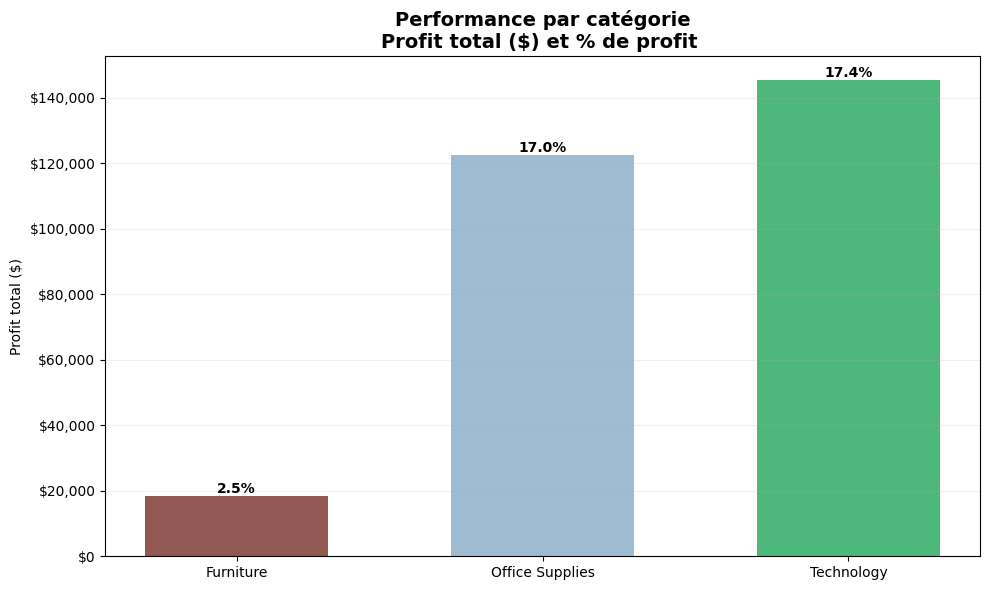

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 🔹 Recalcul performance catégorie
perf_cat = (
    df_cleaned
    .groupby("category")[["sales","profit","discount"]]
    .sum()
)

# 🔹 Calcul marge %
perf_cat["% de profit"] = (perf_cat["profit"] / perf_cat["sales"]) * 100

# 🔹 Couleurs personnalisées
couleurs = {
    "Furniture": "#925953",        # rouge
    "Office Supplies": "#9DBCD1",  # bleu
    "Technology": "#4EB87A"        # vert
}

# 🔹 Graphique
fig, ax1 = plt.subplots(figsize=(10,6))

bars = ax1.bar(
    perf_cat.index,
    perf_cat["profit"],
    color=[couleurs[c] for c in perf_cat.index],
    width=0.6
)

# Format dollar
def dollar_format(x, pos):
    return f"${x:,.0f}"

ax1.yaxis.set_major_formatter(FuncFormatter(dollar_format))
ax1.set_ylabel("Profit total ($)")

# Ajouter marge au-dessus des barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    marge = perf_cat["% de profit"].iloc[i]
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{marge:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold"
    )

plt.title("Performance par catégorie\nProfit total ($) et % de profit ",
          fontsize=14, fontweight="bold")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()





Technology = forte rentabilité

Furniture = faible marge → sensible aux remises

Office Supplies = stable

Analyse par Région 

In [85]:
# Agrégation région
perf_region = df_cleaned.groupby("region").agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
})

# Marge %
perf_region["% de profit"] = (perf_region["profit"] / perf_region["sales"]) * 100

# Taux de perte
df_cleaned["loss"] = (df_cleaned["profit"] < 0).astype(int)
loss_rate = df_cleaned.groupby("region")["loss"].mean() * 100

perf_region["taux_perte_%"] = loss_rate

perf_region


,sales,profit,discount,% de profit,taux_perte_%
region,,,,,
Central,501239.8908,39706.3625,0.240353,7.921629,31.898407
East,678499.8680,91534.8388,0.145311,13.490767,19.388830
South,391721.9050,46749.4303,0.147253,11.934342,15.987654
West,725457.8245,108418.4489,0.109335,14.944831,9.928192


In [86]:
# Trier par profit croissant
perf_region_sorted = perf_region.sort_values("profit")


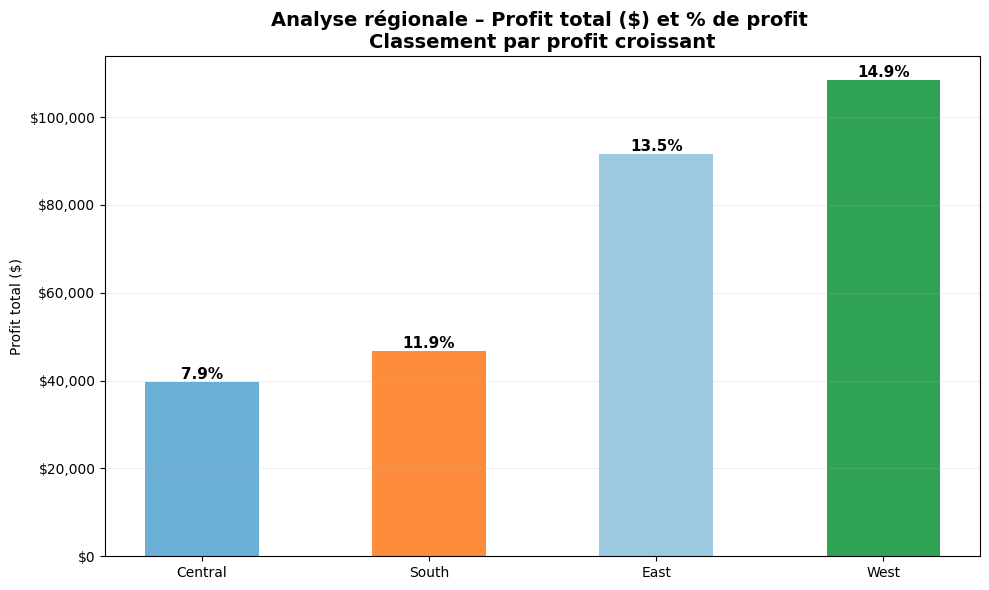

In [87]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Trier par profit croissant
perf_region_sorted = perf_region.sort_values("profit")

# Couleurs différentes par région
couleurs = {
    "Central": "#6BAED6",
    "South": "#FD8D3C",
    "East": "#9ECAE1",
    "West": "#31A354"
}

def dollar_format(x, pos):
    return f"${x:,.0f}"

fig, ax1 = plt.subplots(figsize=(10,6))

bars = ax1.bar(
    perf_region_sorted.index,
    perf_region_sorted["profit"],
    color=[couleurs[r] for r in perf_region_sorted.index],
    width=0.5
)

ax1.yaxis.set_major_formatter(FuncFormatter(dollar_format))
ax1.set_ylabel("Profit total ($)")

# Ajouter marge % au-dessus des barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    marge = perf_region_sorted["% de profit"].iloc[i]
    
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{marge:.1f}%",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

plt.title("Analyse régionale – Profit total ($) et % de profit \nClassement par profit croissant",
          fontsize=14, fontweight="bold")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


Remise moyenne par Région 

In [88]:
df_cleaned.groupby("region")["discount"].mean()

region
Central    0.240353
East       0.145311
South      0.147253
West       0.109335
Name: discount, dtype: float64

La sous-performance de la région Central s’explique par un niveau de remise significativement supérieur (24 %) aux autres régions. Cette politique commerciale impacte directement la marge, réduite à 7.9 %.

Profit par mode d’expédition                                                                                            , Es-ce que le mode de livraison a un impact sur la marge.

In [89]:
perf_ship = df_cleaned.groupby("ship_mode").agg({
    "sales": "sum",
    "profit": "sum",
    "shipping_time_days": "mean"
})

perf_ship["% de profit"] = (perf_ship["profit"] / perf_ship["sales"]) * 100

perf_ship.sort_values("profit")


,sales,profit,shipping_time_days,% de profit
ship_mode,,,,
Same Day,1.283631e+05,15891.7589,0.044199,12.380315
First Class,3.514284e+05,48969.8399,2.182705,13.934513
Second Class,4.591936e+05,57446.6354,3.238046,12.510331
Standard Class,1.357934e+06,164100.8463,5.006704,12.084593


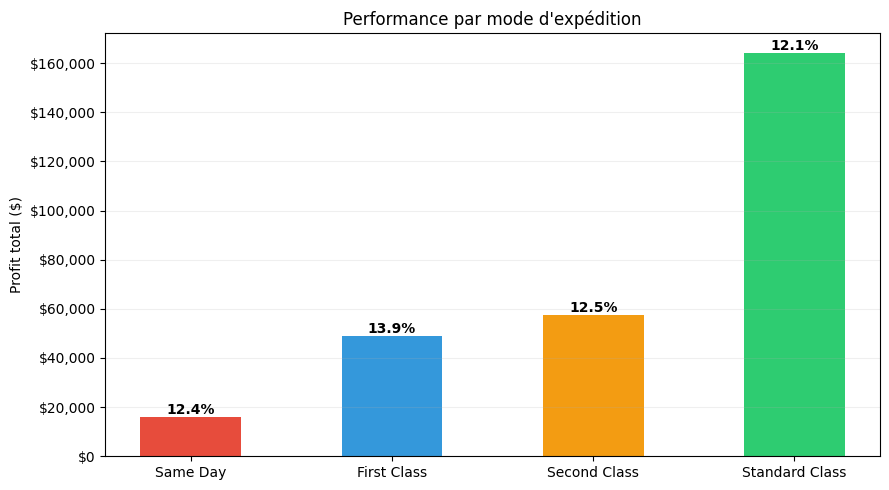

In [90]:

# Palette personnalisée par mode d’expédition
couleurs_ship = {
    "Same Day": "#E74C3C",        # rouge
    "First Class": "#3498DB",     # bleu
    "Second Class": "#F39C12",    # orange
    "Standard Class": "#2ECC71"   # vert
}

def dollar_format(x, pos):
    return f"${x:,.0f}"

perf_ship_sorted = perf_ship.sort_values("profit")

fig, ax = plt.subplots(figsize=(9,5))

bars = ax.bar(
    perf_ship_sorted.index,
    perf_ship_sorted["profit"],
    color=[couleurs_ship[m] for m in perf_ship_sorted.index],
    width=0.5
)

ax.yaxis.set_major_formatter(FuncFormatter(dollar_format))
ax.set_ylabel("Profit total ($)")
ax.set_title("Performance par mode d'expédition")

# Ajouter marge au-dessus des barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    marge = perf_ship_sorted["% de profit"].iloc[i]
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{marge:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


Contrairement à la politique de remise, le mode d’expédition n’impacte pas significativement la rentabilité. La performance logistique est globalement équilibrée entre les différents services

In [91]:
df_cleaned[["shipping_time_days","profit"]].corr(method="spearman")

,shipping_time_days,profit
shipping_time_days,1.000000,-0.007013
profit,-0.007013,1.000000


C’est quasi zéro  -0.007   
 Il n’existe aucune relation significative entre :le délai de livraison et  le profit

In [92]:
df_cleaned.groupby("shipping_time_days")["profit"].mean()

shipping_time_days
0    29.645411
1    20.436929
2    39.818676
3    26.742208
4    25.656990
5    27.078471
6    27.660821
7    32.740494
Name: profit, dtype: float64

Pas de tendance claire, correlation nulle

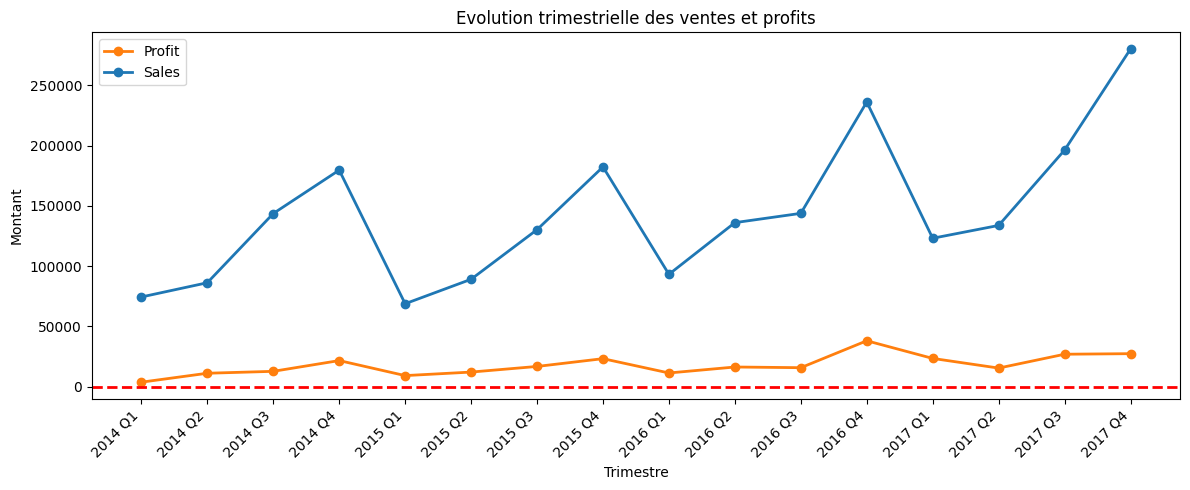

In [93]:
# ===== Evolution trimestrielle des ventes et profits =====

quarterly = (
    df_cleaned
    .set_index("order_date")
    .resample("QE")[["sales", "profit"]]
    .sum()
)

quarterly["year"] = quarterly.index.year
quarterly["quarter"] = quarterly.index.quarter
labels = quarterly["year"].astype(str) + " Q" + quarterly["quarter"].astype(str)

x = range(len(quarterly))

plt.figure(figsize=(12,5))

plt.plot(x, quarterly["profit"],
         label="Profit",
         linewidth=2,
         marker="o",
         color="tab:orange")

plt.plot(x, quarterly["sales"],
         label="Sales",
         linewidth=2,
         marker="o",
         color="tab:blue")

plt.axhline(0, linestyle="--", color="red", linewidth=2)

plt.title("Evolution trimestrielle des ventes et profits")
plt.xlabel("Trimestre")
plt.ylabel("Montant")
plt.legend()

# 🔹 Alignement ajusté pour que le Q soit exactement sous la graduation
plt.xticks(x, labels, rotation=45, ha="right")

plt.tight_layout()
plt.show()

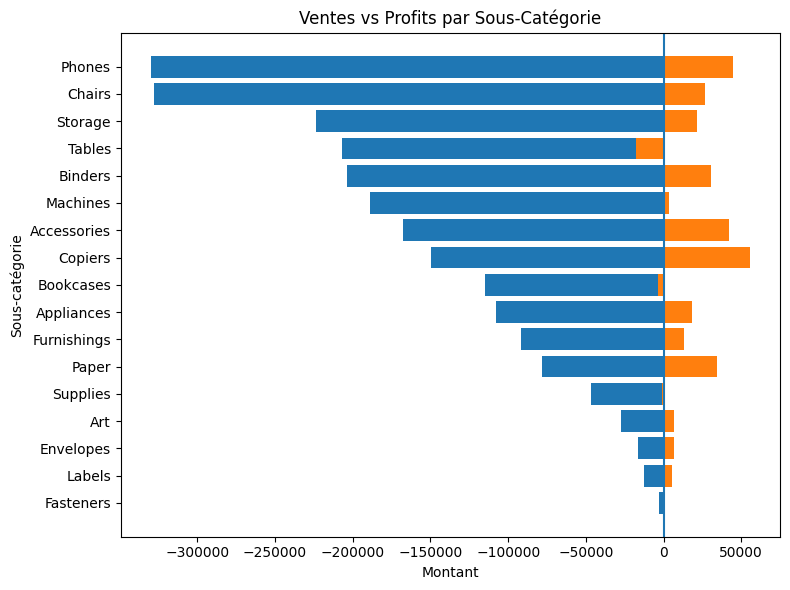

In [94]:
# ===== Ventes vs Profits par Sous-Catégorie =====

subcat = (
    df_cleaned
    .groupby("subcategory")[["sales", "profit"]]
    .sum()
    .sort_values("sales")
)

sales = -subcat["sales"]   # gauche
profit = subcat["profit"]  # droite

plt.figure(figsize=(8,6))

plt.barh(subcat.index, sales)
plt.barh(subcat.index, profit)

plt.axvline(0)

plt.title("Ventes vs Profits par Sous-Catégorie")
plt.xlabel("Montant")
plt.ylabel("Sous-catégorie")

plt.tight_layout()
plt.show()

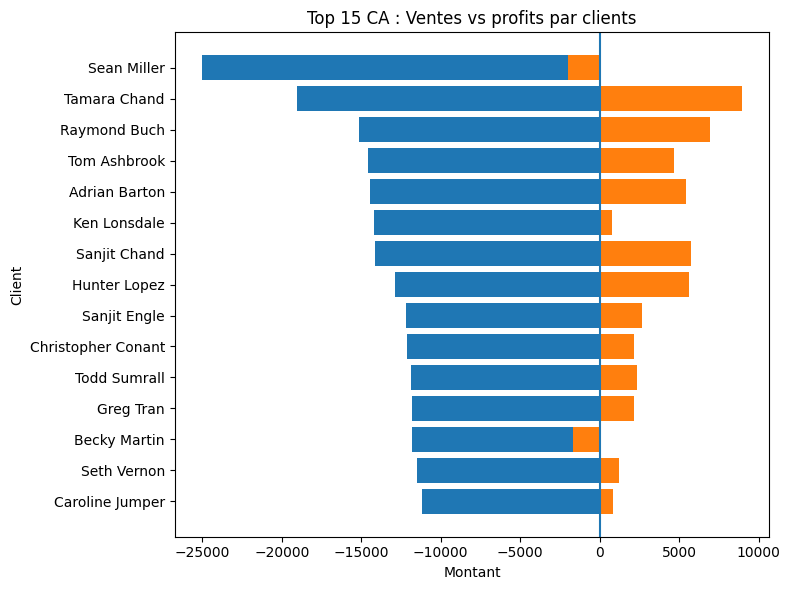

In [95]:
# ===== Top 15 CA : Ventes vs Profits par Clients =====

top_clients = (
    df_cleaned
    .groupby("customer_name")[["sales", "profit"]]
    .sum()
    .sort_values("sales", ascending=False)
    .head(15)
)

# Trier pour affichage horizontal propre
top_clients = top_clients.sort_values("sales")

sales = -top_clients["sales"]   # ventes à gauche
profit = top_clients["profit"]  # profits à droite

plt.figure(figsize=(8,6))

plt.barh(top_clients.index, sales)
plt.barh(top_clients.index, profit)

plt.axvline(0)

plt.title("Top 15 CA : Ventes vs profits par clients")
plt.xlabel("Montant")
plt.ylabel("Client")

plt.tight_layout()
plt.show()


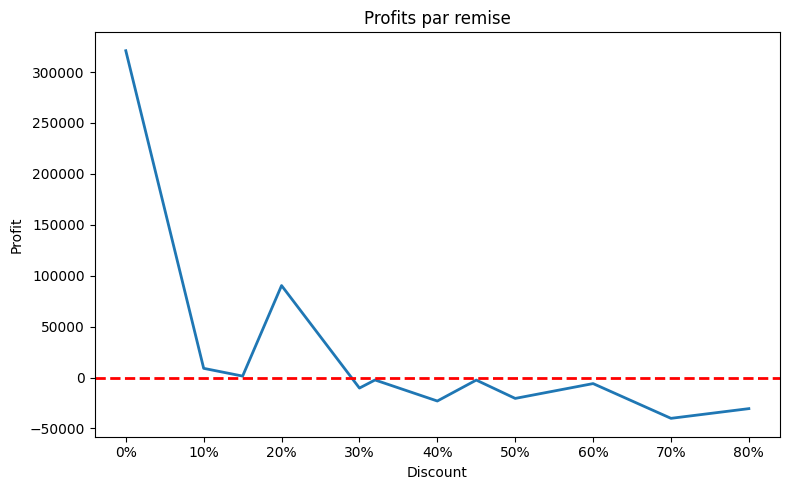

In [96]:
# ===== Profits par remise =====

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

profit_discount = (
    df_cleaned
    .groupby("discount")["profit"]
    .sum()
    .reset_index()
    .sort_values("discount")
)

plt.figure(figsize=(8,5))

# Ligne principale (bleue par défaut)
plt.plot(
    profit_discount["discount"],
    profit_discount["profit"],
    linewidth=2
)

# Ligne horizontale rouge
plt.axhline(0, linestyle="--", color="red", linewidth=2)

# Format axe X en %
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title("Profits par remise")
plt.xlabel("Discount")
plt.ylabel("Profit")

plt.tight_layout()
plt.show()

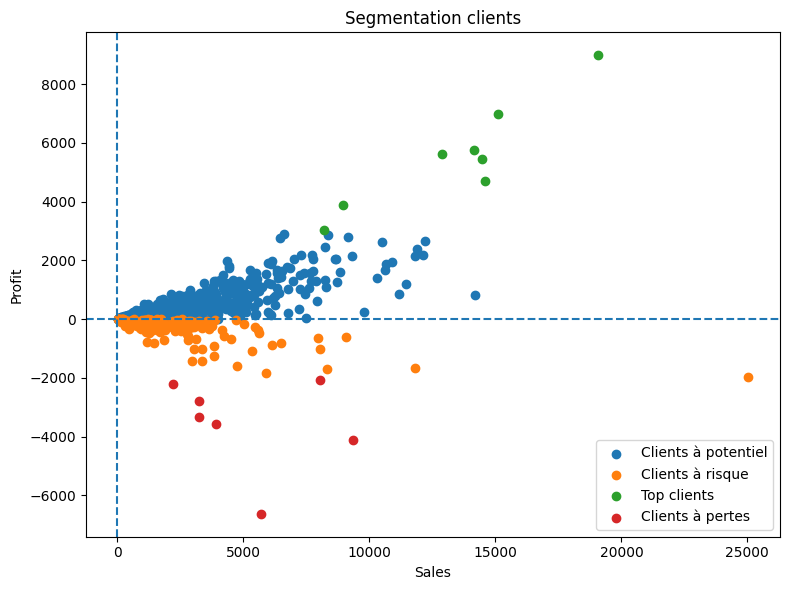

In [97]:
# ===== Segmentation Clients basée sur le profit =====

# Agrégation par client
client_perf = (
    df_cleaned
    .groupby("customer_name")[["sales", "profit"]]
    .sum()
    .reset_index()
)

# Fonction de segmentation selon tes règles
def segment(row):
    if row["profit"] <= -2000:
        return "Clients à pertes"
    elif -2000 < row["profit"] < 0:
        return "Clients à risque"
    elif row["profit"] >= 3000:
        return "Top clients"
    else:
        return "Clients à potentiel"

client_perf["segment"] = client_perf.apply(segment, axis=1)

# ===== Graphique =====

plt.figure(figsize=(8,6))

for s in client_perf["segment"].unique():
    subset = client_perf[client_perf["segment"] == s]
    plt.scatter(subset["sales"], subset["profit"], label=s)

plt.axhline(0, linestyle="--")
plt.axvline(0, linestyle="--")

plt.title("Segmentation clients")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()

plt.tight_layout()
plt.show()
